In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
market = pd.read_excel(r"C:\Users\VAIBHAV\Downloads\marketing_ab_testing_ecommerce.xlsx")

In [6]:
market

,user_id,test_group,visit_date,device_type,traffic_source,page_views,time_on_site_sec,added_to_cart,purchased,order_value
0,1,A,2024-03-31,Mobile,Email,8,156,1,0,0.00
1,2,A,2024-01-12,Desktop,Email,9,360,0,0,0.00
2,3,A,2024-03-09,Mobile,Paid,1,172,0,0,0.00
3,4,A,2024-02-11,Mobile,Email,8,236,1,0,0.00
4,5,B,2024-02-23,Mobile,Social,12,419,1,1,355.50
...,...,...,...,...,...,...,...,...,...,...
995,996,A,2024-01-03,Mobile,Social,12,151,1,1,115.15
996,997,B,2024-01-09,Desktop,Organic,9,858,1,0,0.00
997,998,B,2024-03-20,Desktop,Social,5,60,1,1,346.34
998,999,B,2024-03-14,Desktop,Paid,9,273,1,0,0.00


In [8]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           1000 non-null   int64         
 1   test_group        1000 non-null   object        
 2   visit_date        1000 non-null   datetime64[ns]
 3   device_type       1000 non-null   object        
 4   traffic_source    1000 non-null   object        
 5   page_views        1000 non-null   int64         
 6   time_on_site_sec  1000 non-null   int64         
 7   added_to_cart     1000 non-null   int64         
 8   purchased         1000 non-null   int64         
 9   order_value       1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 78.3+ KB


In [9]:
market.head()

,user_id,test_group,visit_date,device_type,traffic_source,page_views,time_on_site_sec,added_to_cart,purchased,order_value
0,1,A,2024-03-31,Mobile,Email,8,156,1,0,0.0
1,2,A,2024-01-12,Desktop,Email,9,360,0,0,0.0
2,3,A,2024-03-09,Mobile,Paid,1,172,0,0,0.0
3,4,A,2024-02-11,Mobile,Email,8,236,1,0,0.0
4,5,B,2024-02-23,Mobile,Social,12,419,1,1,355.5


In [10]:
market.tail()

,user_id,test_group,visit_date,device_type,traffic_source,page_views,time_on_site_sec,added_to_cart,purchased,order_value
995,996,A,2024-01-03,Mobile,Social,12,151,1,1,115.15
996,997,B,2024-01-09,Desktop,Organic,9,858,1,0,0.00
997,998,B,2024-03-20,Desktop,Social,5,60,1,1,346.34
998,999,B,2024-03-14,Desktop,Paid,9,273,1,0,0.00
999,1000,B,2024-03-10,Desktop,Organic,9,1026,0,0,0.00


In [11]:
market.dtypes

user_id                      int64
test_group                  object
visit_date          datetime64[ns]
device_type                 object
traffic_source              object
page_views                   int64
time_on_site_sec             int64
added_to_cart                int64
purchased                    int64
order_value                float64
dtype: object

In [12]:
market.sample()

,user_id,test_group,visit_date,device_type,traffic_source,page_views,time_on_site_sec,added_to_cart,purchased,order_value
757,758,B,2024-02-14,Desktop,Paid,6,206,0,0,0.0


In [18]:
market[["traffic_source"]]

,traffic_source
0,Email
1,Email
2,Paid
3,Email
4,Social
...,...
995,Social
996,Organic
997,Social
998,Paid


In [19]:
market["traffic_source"].count


<bound method Series.count of 0        Email
1        Email
2         Paid
3        Email
4       Social
        ...   
995     Social
996    Organic
997     Social
998       Paid
999    Organic
Name: traffic_source, Length: 1000, dtype: object>

In [20]:
market["traffic_source"].value_counts()

traffic_source
Email      267
Social     257
Organic    247
Paid       229
Name: count, dtype: int64

In [21]:
market["traffic_source"].value_counts(ascending=False).head(10)

traffic_source
Email      267
Social     257
Organic    247
Paid       229
Name: count, dtype: int64

<Axes: xlabel='traffic_source'>

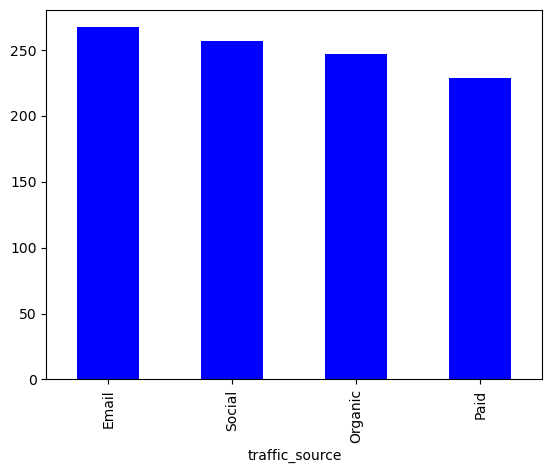

In [22]:
market["traffic_source"].value_counts(ascending=False).head(10).plot(kind="bar", color="b")

In [23]:
market.shape

(1000, 10)

In [24]:
market.shape[0]

1000

In [25]:
market.shape[0] * market.shape[1]

10000

In [26]:
market.size

10000

In [27]:
market.dtypes

user_id                      int64
test_group                  object
visit_date          datetime64[ns]
device_type                 object
traffic_source              object
page_views                   int64
time_on_site_sec             int64
added_to_cart                int64
purchased                    int64
order_value                float64
dtype: object

Identify Control vs Test Groups

In [31]:
control = market[market["test_group"] == "A"]   # Control
test = market[market["test_group"] == "B"]      # Test

In [32]:
alpha = 0.05

Calculate Conversion Rates

In [33]:
conv_control = control["purchased"].mean()
conv_test = test["purchased"].mean()
conv_control, conv_test

(0.30426356589147285, 0.26859504132231404)

Run the Statistical Test

In [34]:
from scipy import stats

contingency = pd.crosstab(market["test_group"], market["purchased"])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

p_value

0.23953846239517018

Calculate 95% Confidence Interval

In [36]:
import numpy as np

n_c, n_t = len(control), len(test)
diff = conv_test - conv_control

se = np.sqrt(
    (conv_control*(1-conv_control)/n_c) +
    (conv_test*(1-conv_test)/n_t)
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

ci_low, ci_high

(-0.09166207957370875, 0.02032503043539114)

Visuakize Conversation Rates

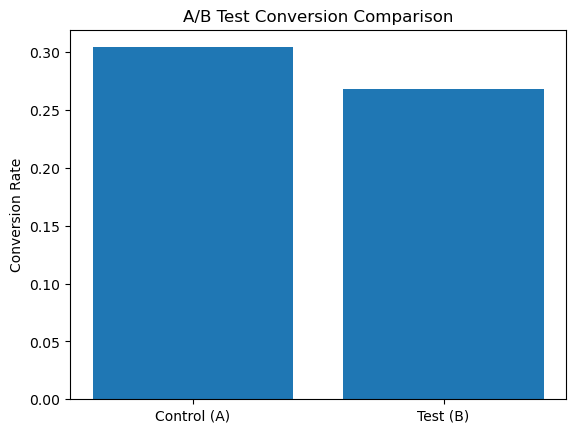

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(["Control (A)", "Test (B)"], [conv_control, conv_test])
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Comparison")
plt.show()